# Google Stock price Prediction using Long-Short Time Memory Architecture (RNN)
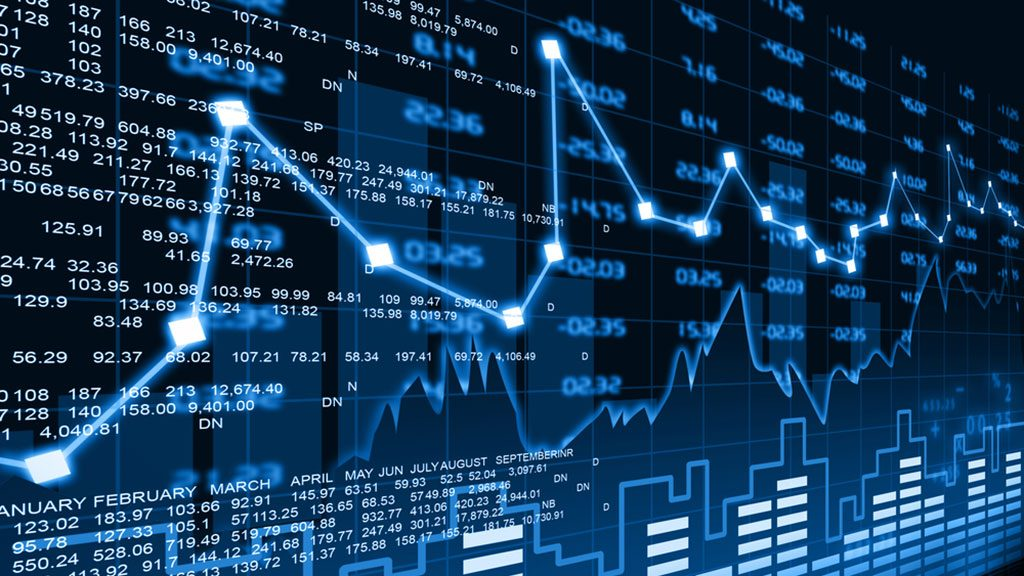

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Reading the Datasets

In [2]:
dataset_train = pd.read_csv("trainset.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [3]:
dataset_test =pd.read_csv("testset.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [4]:
dataset_train.shape

(1259, 7)

# Plotting a graph of Open, High, Low and Close column

In [84]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter( y=dataset_train.Open, name='Real Price',
                         line=dict(color='royalblue', width=15)))
fig.add_trace(go.Scatter( y=dataset_train.High, name = 'Predicted Price',
                         line=dict(color='firebrick', width=8)))
fig.add_trace(go.Scatter( y=dataset_train.Low, name = 'Predicted Price',
                         line=dict(color='black', width=6)))
fig.add_trace(go.Scatter( y=dataset_train.Close, name = 'Predicted Price',
                         line=dict(color='green', width=2)))

# For the Open Stock Price

### Selecting Open column from Trainset

In [5]:
trainset = dataset_train.iloc[:,1:2]

### Selecting Open column from Testset

In [6]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [7]:
trainset

,Open
0,357.385559
1,360.122742
2,362.313507
3,365.348755
4,365.393463
...,...
1254,1061.109985
1255,1058.069946
1256,1057.390015
1257,1051.599976


In [8]:
trainset.shape

(1259, 1)

# Data Pre-Processing

In [9]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [10]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

# Feature Scaling 
## Using MinMax Scalar 

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [ ]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

In [13]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

# X_train and Y_train generation

In [14]:
x_train = []
y_train = []

In [15]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train

array([[0.01011148, 0.01388614, 0.01690727, ..., 0.07456192, 0.0698898 ,
        0.068047  ],
       [0.01388614, 0.01690727, 0.02109298, ..., 0.0698898 , 0.068047  ,
        0.06189514],
       [0.01690727, 0.02109298, 0.02115463, ..., 0.068047  , 0.06189514,
        0.06842378],
       ...,
       [0.84110805, 0.83286147, 0.83699857, ..., 0.98586493, 0.9805695 ,
        0.97637719],
       [0.83286147, 0.83699857, 0.83491622, ..., 0.9805695 , 0.97637719,
        0.97543954],
       [0.83699857, 0.83491622, 0.85037519, ..., 0.97637719, 0.97543954,
        0.9674549 ]])

In [17]:
x_train.shape

(1199, 60)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [19]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [20]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [21]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [22]:
inputs

array([[0.83491622],
       [0.85037519],
       [0.86871629],
       [0.86871629],
       [0.86005593],
       [0.87899009],
       [0.88526466],
       [0.88540253],
       [0.88290649],
       [0.88494751],
       [0.87699047],
       [0.88173435],
       [0.88184469],
       [0.85492597],
       [0.85267815],
       [0.86871629],
       [0.90897021],
       [0.91560335],
       [0.91728573],
       [0.92003007],
       [0.92630465],
       [0.92678727],
       [0.93627502],
       [0.93390312],
       [0.93838498],
       [0.94317017],
       [0.93278603],
       [0.9285938 ],
       [0.92744927],
       [0.92278813],
       [0.92735273],
       [0.94319778],
       [0.9242361 ],
       [0.92844213],
       [0.94456301],
       [0.94576276],
       [0.95145817],
       [0.9722677 ],
       [0.95515404],
       [0.92714584],
       [0.91808559],
       [0.91375541],
       [0.89069805],
       [0.89836546],
       [0.92447051],
       [0.94799678],
       [0.94525252],
       [0.950

# Building The LSTM model

In [23]:
regressor = Sequential()

# LSTM with 3 hidden Layers

In [24]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

# Compiling with ADAM Optimizer and Mean Squared Error Loss function 

In [29]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',  metrics = ['accuracy'])

# Fitting the Dataset into the Model

In [30]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
38/38 [==============================] - 2s 57ms/step - loss: 0.0271 - accuracy: 8.3403e-04 0s - loss: 0.0
Epoch 2/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0040 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0032 - accuracy: 8.3403e-04 0s - loss: 0.0033 - accuracy: 
Epoch 4/100
38/38 [=

38/38 [==============================] - 4s 95ms/step - loss: 0.0012 - accuracy: 8.3403e-04
Epoch 69/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0013 - accuracy: 8.3403e-04
Epoch 70/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0012 - accuracy: 8.3403e-04
Epoch 71/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0012 - accuracy: 8.3403e-04
Epoch 72/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0013 - accuracy: 8.3403e-04
Epoch 73/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0012 - accuracy: 8.3403e-04
Epoch 74/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0012 - accuracy: 8.3403e-04
Epoch 75/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0011 - accuracy: 8.3403e-04
Epoch 76/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0011 - accuracy: 8.3403e-04
Epoch 77/100
38/38 [==============================] - 3s 79ms/step 

# Predict for Test Set

In [31]:
predicted_price = regressor.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [32]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1071.5259],
       [1070.0262],
       [1073.0911],
       [1082.9264],
       [1094.7245],
       [1105.5885],
       [1114.3062],
       [1116.8834],
       [1117.8118],
       [1117.3246],
       [1123.1399],
       [1129.6018],
       [1135.6589],
       [1140.0885],
       [1143.9847],
       [1151.7653],
       [1163.4613],
       [1172.7778],
       [1178.8617],
       [1182.306 ],
       [1182.119 ],
       [1181.3479],
       [1179.3866],
       [1169.1841],
       [1151.5629],
       [1122.6003],
       [1107.026 ],
       [1098.411 ],
       [1087.1285],
       [1082.8585],
       [1082.7163],
       [1084.7119],
       [1092.7794],
       [1103.0878],
       [1111.1234],
       [1118.404 ],
       [1125.0228],
       [1128.4318],
       [1132.4252],
       [1138.6893],
       [1140.4968],
       [1136.3778],
       [1119.2954],
       [1105.3834],
       [1103.0804],
       [1105.7402],
       [1115.3046],
       [1129.9552],
       [1148.6687],
       [1164.9132],


# Predicted Stock Prive vs  Real Stock Price for Open Stock price

In [36]:
data = np.concatenate((predicted_price.reshape(len(predicted_price),1), real_stock_price.reshape(len(real_stock_price),1)),1)
print(data)

[[1071.52587891 1048.339966  ]
 [1070.02624512 1064.310059  ]
 [1073.09106445 1088.        ]
 [1082.9263916  1094.        ]
 [1094.7244873  1102.22998   ]
 [1105.58850098 1109.400024  ]
 [1114.30615234 1097.099976  ]
 [1116.88342285 1106.300049  ]
 [1117.81176758 1102.410034  ]
 [1117.32458496 1132.51001   ]
 [1123.13989258 1126.219971  ]
 [1129.60180664 1131.410034  ]
 [1135.65893555 1131.829956  ]
 [1140.08850098 1137.48999   ]
 [1143.98474121 1159.849976  ]
 [1151.76525879 1177.329956  ]
 [1163.46130371 1172.530029  ]
 [1172.77783203 1175.079956  ]
 [1178.86169434 1176.47998   ]
 [1182.30603027 1167.829956  ]
 [1182.11901855 1170.569946  ]
 [1181.34790039 1162.609985  ]
 [1179.38659668 1122.        ]
 [1169.18408203 1090.599976  ]
 [1151.56286621 1027.180054  ]
 [1122.6003418  1081.540039  ]
 [1107.02600098 1055.410034  ]
 [1098.41101074 1017.25      ]
 [1087.12854004 1048.        ]
 [1082.85852051 1045.        ]
 [1082.71630859 1048.949951  ]
 [1084.71191406 1079.069946  ]
 [1092.7

# Storing into a csv File

In [38]:
dataset = pd.DataFrame({'real_stock_price': data[:, 0], 'predicted_price': data[:, 1]})
dataset.to_csv('accuracy.csv')

# The Whole process I am repeating for other columns

# For the High Stock Price

In [85]:
trainset = dataset_train.iloc[:,2:3]

real_stock_price = dataset_test.iloc[:,2:3].values

print(trainset.shape)

dataset_total = pd.concat((dataset_train['High'],dataset_test['High']),axis = 0)
print(dataset_total)

inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
print(inputs)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

training_scaled

x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

print(x_train)

print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(1259, 1)
0       361.151062
1       363.600128
2       368.339294
3       367.301056
4       365.771027
          ...     
120    1143.910034
121    1133.209961
122    1131.836060
123    1122.310059
124    1128.227051
Name: High, Length: 1384, dtype: float64
[ 970.909973  979.460022  985.424988  981.570007  990.710022  994.119995
  997.210022  993.906982  996.440002  996.719971  988.880005  991.
  989.52002   972.22998   976.090027  987.599976 1048.390015 1024.969971
 1024.       1029.670044 1028.089966 1032.650024 1034.869995 1033.969971
 1043.521973 1033.98999  1030.76001  1031.579956 1026.810059 1024.089966
 1035.920044 1034.420044 1022.609985 1035.109985 1039.706055 1043.177979
 1055.459961 1062.375    1044.079956 1028.48999  1022.48999  1016.099976
 1020.609985 1024.969971 1034.23999  1042.050049 1043.800049 1050.310059
 1046.665039 1058.5      1067.619995 1078.48999  1076.839966 1073.380005
 1069.329956 1064.199951 1060.119995 1058.369995 1054.75     1049.699951
 1066.939941 108

# Fitting the dataset into The Model

In [41]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 138ms/step - loss: 8.5641e-04 - accuracy: 8.3403e-04
Epoch 2/100
38/38 [==============================] - 5s 141ms/step - loss: 8.7052e-04 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 5s 130ms/step - loss: 8.2131e-04 - accuracy: 8.3403e-04
Epoch 4/100
38/38 [==============================] - 3s 77ms/step - loss: 8.3649e-04 - accuracy: 8.3403e-04
Epoch 5/100
38/38 [==============================] - 3s 76ms/step - loss: 8.9822e-04 - accuracy: 8.3403e-04
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 8.4800e-04 - accuracy: 8.3403e-04
Epoch 7/100
38/38 [==============================] - 3s 75ms/step - loss: 7.8479e-04 - accuracy: 8.3403e-04
Epoch 8/100
38/38 [==============================] - 3s 81ms/step - loss: 7.9927e-04 - accuracy: 8.3403e-04
Epoch 9/100
38/38 [==============================] - 3s 75ms/step - loss: 7.7867e-04 - accuracy: 8.3403e-04
Epoch 10/100
38/38 [=====

38/38 [==============================] - 3s 81ms/step - loss: 7.1088e-04 - accuracy: 8.3403e-04
Epoch 77/100
38/38 [==============================] - 3s 77ms/step - loss: 7.2716e-04 - accuracy: 8.3403e-04
Epoch 78/100
38/38 [==============================] - 3s 75ms/step - loss: 6.7630e-04 - accuracy: 8.3403e-04
Epoch 79/100
38/38 [==============================] - 3s 74ms/step - loss: 6.7423e-04 - accuracy: 8.3403e-04
Epoch 80/100
38/38 [==============================] - 3s 75ms/step - loss: 7.1017e-04 - accuracy: 8.3403e-04
Epoch 81/100
38/38 [==============================] - 3s 76ms/step - loss: 7.0079e-04 - accuracy: 8.3403e-04
Epoch 82/100
38/38 [==============================] - 3s 89ms/step - loss: 5.9938e-04 - accuracy: 8.3403e-04
Epoch 83/100
38/38 [==============================] - 4s 93ms/step - loss: 7.1979e-04 - accuracy: 8.3403e-04 1s -
Epoch 84/100
38/38 [==============================] - 3s 87ms/step - loss: 6.5445e-04 - accuracy: 8.3403e-04
Epoch 85/100
38/38 [=======

# Predict for Test Set

In [42]:
predicted_price = regressor.predict(x_test)

In [43]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1042.46  ],
       [1052.1406],
       [1065.3514],
       [1071.9154],
       [1079.7267],
       [1085.7799],
       [1087.0815],
       [1084.6158],
       [1086.0657],
       [1097.2539],
       [1108.5865],
       [1106.8702],
       [1107.5901],
       [1111.7012],
       [1125.6128],
       [1134.9813],
       [1141.9861],
       [1142.0923],
       [1143.3396],
       [1150.7339],
       [1146.8744],
       [1145.2482],
       [1146.3037],
       [1118.8535],
       [1106.8392],
       [1088.405 ],
       [1083.8619],
       [1068.5139],
       [1055.6405],
       [1062.0825],
       [1059.8928],
       [1065.8738],
       [1077.4952],
       [1086.3049],
       [1092.7242],
       [1105.4163],
       [1101.2219],
       [1103.677 ],
       [1114.267 ],
       [1116.3896],
       [1108.0474],
       [1097.54  ],
       [1080.0638],
       [1085.5044],
       [1088.8033],
       [1094.8639],
       [1104.6224],
       [1125.3765],
       [1137.911 ],
       [1140.4434],


# Predicted Stock Prive vs Real Stock Price for High Stock price

In [45]:
data = np.concatenate((predicted_price.reshape(len(predicted_price),1), real_stock_price.reshape(len(real_stock_price),1)),1)
print(data)

[[1042.45996094 1066.939941  ]
 [1052.140625   1086.290039  ]
 [1065.35144043 1093.569946  ]
 [1071.91540527 1104.25      ]
 [1079.72668457 1111.27002   ]
 [1085.77990723 1110.569946  ]
 [1087.08154297 1104.599976  ]
 [1084.61584473 1106.525024  ]
 [1086.06567383 1124.290039  ]
 [1097.25390625 1139.910034  ]
 [1108.58654785 1132.599976  ]
 [1106.87023926 1132.51001   ]
 [1107.59008789 1137.859985  ]
 [1111.70117188 1159.880005  ]
 [1125.61279297 1171.626953  ]
 [1134.98132324 1179.859985  ]
 [1141.98608398 1175.939941  ]
 [1142.09228516 1175.839966  ]
 [1143.33959961 1186.890015  ]
 [1150.73388672 1176.52002   ]
 [1146.87438965 1173.        ]
 [1145.24816895 1174.        ]
 [1146.30371094 1123.069946  ]
 [1118.85351562 1110.        ]
 [1106.8392334  1081.709961  ]
 [1088.4050293  1081.780029  ]
 [1083.86193848 1058.619995  ]
 [1068.51391602 1043.969971  ]
 [1055.64050293 1061.5       ]
 [1062.08251953 1058.369995  ]
 [1059.89282227 1071.719971  ]
 [1065.8737793  1091.479004  ]
 [1077.4

# Storing into a csv File

In [46]:
dataset = pd.DataFrame({'real_stock_price_high': data[:, 0], 'predicted_price_high': data[:, 1]})
dataset.to_csv('accuracy1.csv')

# For the Low Stock Price

In [86]:
trainset = dataset_train.iloc[:,3:4]

real_stock_price = dataset_test.iloc[:,3:4].values

print(trainset.shape)

dataset_total = pd.concat((dataset_train['Low'],dataset_test['Low']),axis = 0)
print(dataset_total)

inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
print(inputs)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

print(training_scaled)

x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

print(x_train)

print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(1259, 1)
0       355.959839
1       358.031342
2       361.488861
3       362.929504
4       359.874359
          ...     
120    1112.780029
121    1116.659058
122    1103.619995
123    1096.010010
124    1115.000000
Name: Low, Length: 1384, dtype: float64
[ 955.179993  963.359985  976.109985  966.080017  972.25      985.
  989.        984.        988.590027  986.974976  978.390015  984.580017
  966.119995  961.        960.52002   972.200012 1008.200012 1007.5
 1010.419983 1016.950012 1013.01001  1020.309998 1025.       1025.130005
 1028.449951 1019.666016 1025.280029 1022.570007 1014.150024 1015.419983
 1022.52002  1017.75     1017.5      1022.655029 1031.430054 1035.
 1038.439941 1040.       1015.650024 1015.       1002.02002   995.570007
  988.280029 1001.140015 1018.070984 1032.521973 1032.050049 1033.689941
 1038.380005 1043.109985 1049.5      1062.       1063.550049 1061.52002
 1061.793945 1059.439941 1050.199951 1048.050049 1044.77002  1044.900024
 1045.22998  1063.209961 1084

# Fitting the Dataset into The Model

In [48]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 121ms/step - loss: 6.7188e-04 - accuracy: 8.3403e-04
Epoch 2/100
38/38 [==============================] - 4s 98ms/step - loss: 6.2702e-04 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 6.8492e-04 - accuracy: 8.3403e-04
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 6.3584e-04 - accuracy: 8.3403e-04
Epoch 5/100
38/38 [==============================] - 4s 105ms/step - loss: 6.8750e-04 - accuracy: 8.3403e-04
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 6.5879e-04 - accuracy: 8.3403e-04
Epoch 7/100
38/38 [==============================] - 4s 97ms/step - loss: 7.0101e-04 - accuracy: 8.3403e-04
Epoch 8/100
38/38 [==============================] - 4s 101ms/step - loss: 6.6815e-04 - accuracy: 8.3403e-040s - loss: 6.7311e-04 - accuracy: 8.4459
Epoch 9/100
38/38 [==============================] - 4s 95ms/step - loss: 6.5140e-04 - accu

38/38 [==============================] - 3s 83ms/step - loss: 5.6698e-04 - accuracy: 8.3403e-04
Epoch 75/100
38/38 [==============================] - 3s 88ms/step - loss: 6.1109e-04 - accuracy: 8.3403e-04
Epoch 76/100
38/38 [==============================] - 3s 91ms/step - loss: 8.3547e-04 - accuracy: 8.3403e-04
Epoch 77/100
38/38 [==============================] - 3s 89ms/step - loss: 6.1835e-04 - accuracy: 8.3403e-04
Epoch 78/100
38/38 [==============================] - 4s 95ms/step - loss: 6.3702e-04 - accuracy: 8.3403e-04
Epoch 79/100
38/38 [==============================] - 3s 83ms/step - loss: 7.0767e-04 - accuracy: 8.3403e-04
Epoch 80/100
38/38 [==============================] - 4s 95ms/step - loss: 6.0433e-04 - accuracy: 8.3403e-04
Epoch 81/100
38/38 [==============================] - 3s 92ms/step - loss: 5.9216e-04 - accuracy: 8.3403e-04
Epoch 82/100
38/38 [==============================] - 3s 76ms/step - loss: 6.2317e-04 - accuracy: 8.3403e-04
Epoch 83/100
38/38 [============

# Predict for Test Data

In [49]:
predicted_price = regressor.predict(x_test)

In [50]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1044.5446 ],
       [1044.618  ],
       [1056.7466 ],
       [1071.6793 ],
       [1079.0476 ],
       [1087.4529 ],
       [1089.2885 ],
       [1087.3402 ],
       [1090.0999 ],
       [1091.569  ],
       [1102.6869 ],
       [1103.6366 ],
       [1105.1942 ],
       [1112.8971 ],
       [1118.3718 ],
       [1134.2705 ],
       [1138.1497 ],
       [1141.3837 ],
       [1140.19   ],
       [1149.1456 ],
       [1145.4075 ],
       [1143.5084 ],
       [1142.6816 ],
       [1112.7236 ],
       [1075.0784 ],
       [1050.1409 ],
       [1060.7026 ],
       [1026.3176 ],
       [1015.8768 ],
       [1045.9937 ],
       [1047.9523 ],
       [1049.7413 ],
       [1061.9589 ],
       [1078.5894 ],
       [1080.4183 ],
       [1093.0366 ],
       [1092.2833 ],
       [1094.3948 ],
       [1108.8673 ],
       [1105.0378 ],
       [1096.6344 ],
       [1073.2036 ],
       [1058.1326 ],
       [1068.8588 ],
       [1081.441  ],
       [1079.7063 ],
       [1098.2762 ],
       [1112.

# Predicted Stock Prive vs Real Stock Price for Low Stock Price

In [52]:
data = np.concatenate((predicted_price.reshape(len(predicted_price),1), real_stock_price.reshape(len(real_stock_price),1)),1)
print(data)

[[1044.54455566 1045.22998   ]
 [1044.61804199 1063.209961  ]
 [1056.74658203 1084.001953  ]
 [1071.67932129 1092.        ]
 [1079.04760742 1101.619995  ]
 [1087.45288086 1101.230957  ]
 [1089.28845215 1096.109985  ]
 [1087.34020996 1099.589966  ]
 [1090.09985352 1101.150024  ]
 [1091.56896973 1117.832031  ]
 [1102.68688965 1117.01001   ]
 [1103.63659668 1117.5       ]
 [1105.19421387 1128.300049  ]
 [1112.89709473 1135.109985  ]
 [1118.37182617 1158.75      ]
 [1134.27050781 1161.050049  ]
 [1138.1496582  1162.76001   ]
 [1141.38366699 1158.109985  ]
 [1140.18994141 1171.97998   ]
 [1149.14562988 1163.52002   ]
 [1145.4074707  1159.130005  ]
 [1143.50842285 1157.52002   ]
 [1142.68164062 1107.277954  ]
 [1112.72363281 1052.030029  ]
 [1075.07836914 1023.137024  ]
 [1050.14086914 1048.26001   ]
 [1060.70263672 1000.659973  ]
 [1026.31762695  992.559998  ]
 [1015.87677002 1040.927979  ]
 [1045.99365234 1044.087036  ]
 [1047.95227051 1046.75      ]
 [1049.74133301 1064.339966  ]
 [1061.9

# Storing into a CSV File

In [53]:
dataset = pd.DataFrame({'real_stock_price_low': data[:, 0], 'predicted_price_low': data[:, 1]})
dataset.to_csv('accuracy2.csv')

# For the Closing Stock Value

In [87]:
trainset = dataset_train.iloc[:,4:5]

real_stock_price = dataset_test.iloc[:,4:5].values

print(trainset.shape)

dataset_total = pd.concat((dataset_train['Close'],dataset_test['Close']),axis = 0)
print(dataset_total)

inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
print(inputs)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

print(training_scaled)

x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

print(x_train)

print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(1259, 1)
0       359.288177
1       359.496826
2       366.600616
3       365.001007
4       364.280701
          ...     
120    1124.810059
121    1118.459961
122    1103.979980
123    1114.219971
124    1115.650024
Name: Close, Length: 1384, dtype: float64
[ 969.960022  978.890015  977.        972.599976  989.25      987.830017
  989.679993  992.        992.179993  992.809998  984.450012  988.200012
  968.450012  970.539978  973.330017  972.559998 1019.27002  1017.109985
 1016.640015 1025.5      1025.579956 1032.47998  1025.900024 1033.329956
 1039.849976 1031.26001  1028.069946 1025.75     1026.       1020.909973
 1032.5      1019.090027 1018.380005 1034.48999  1035.959961 1040.609985
 1054.209961 1047.410034 1021.659973 1021.409973 1010.169983  998.679993
 1005.150024 1018.380005 1030.930054 1037.050049 1041.099976 1040.47998
 1040.609985 1049.150024 1064.189941 1077.140015 1070.680054 1064.949951
 1063.630005 1060.119995 1056.73999  1049.369995 1048.140015 1046.400024
 1065.    

# Fitting Dataset into the Model

In [56]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 79ms/step - loss: 6.5677e-04 - accuracy: 8.3403e-04
Epoch 2/100
38/38 [==============================] - 3s 84ms/step - loss: 5.7144e-04 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 3s 88ms/step - loss: 6.3822e-04 - accuracy: 8.3403e-04
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 5.6356e-04 - accuracy: 8.3403e-04
Epoch 5/100
38/38 [==============================] - 4s 101ms/step - loss: 6.0930e-04 - accuracy: 8.3403e-04
Epoch 6/100
38/38 [==============================] - 4s 97ms/step - loss: 5.7219e-04 - accuracy: 8.3403e-04
Epoch 7/100
38/38 [==============================] - 3s 88ms/step - loss: 6.0176e-04 - accuracy: 8.3403e-04
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 5.8489e-04 - accuracy: 8.3403e-04
Epoch 9/100
38/38 [==============================] - 3s 89ms/step - loss: 5.8552e-04 - accuracy: 8.3403e-04
Epoch 10/100
38/38 [=======

38/38 [==============================] - 3s 84ms/step - loss: 5.8841e-04 - accuracy: 8.3403e-04
Epoch 76/100
38/38 [==============================] - 3s 91ms/step - loss: 5.6331e-04 - accuracy: 8.3403e-04
Epoch 77/100
38/38 [==============================] - 4s 99ms/step - loss: 6.1483e-04 - accuracy: 8.3403e-04
Epoch 78/100
38/38 [==============================] - 4s 94ms/step - loss: 6.0573e-04 - accuracy: 8.3403e-04
Epoch 79/100
38/38 [==============================] - 3s 90ms/step - loss: 6.0428e-04 - accuracy: 8.3403e-04
Epoch 80/100
38/38 [==============================] - 3s 85ms/step - loss: 5.5939e-04 - accuracy: 8.3403e-04
Epoch 81/100
38/38 [==============================] - 3s 79ms/step - loss: 5.8681e-04 - accuracy: 8.3403e-04
Epoch 82/100
38/38 [==============================] - 3s 77ms/step - loss: 6.4852e-04 - accuracy: 8.3403e-04
Epoch 83/100
38/38 [==============================] - 3s 86ms/step - loss: 6.6398e-04 - accuracy: 8.3403e-04
Epoch 84/100
38/38 [============

# Predicion for Test Dataset

In [57]:
predicted_price = regressor.predict(x_test)

In [58]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1037.3186 ],
       [1049.7972 ],
       [1064.0072 ],
       [1069.4705 ],
       [1081.7335 ],
       [1088.405  ],
       [1089.6318 ],
       [1087.901  ],
       [1089.5308 ],
       [1100.1782 ],
       [1101.6438 ],
       [1108.2762 ],
       [1109.1687 ],
       [1114.6301 ],
       [1127.4727 ],
       [1138.9971 ],
       [1138.7212 ],
       [1143.1958 ],
       [1148.3221 ],
       [1149.413  ],
       [1142.8281 ],
       [1145.2559 ],
       [1144.6318 ],
       [1110.6318 ],
       [1067.8513 ],
       [1076.5071 ],
       [1054.7306 ],
       [1015.4338 ],
       [1034.9087 ],
       [1047.9735 ],
       [1048.242  ],
       [1060.683  ],
       [1077.5278 ],
       [1084.0885 ],
       [1089.8118 ],
       [1096.4825 ],
       [1094.0771 ],
       [1105.3009 ],
       [1117.5138 ],
       [1103.5645 ],
       [1092.2103 ],
       [1067.9272 ],
       [1068.8705 ],
       [1075.8419 ],
       [1078.489  ],
       [1088.7151 ],
       [1102.5531 ],
       [1127.

# Predicted Stock Prive vs Real Stock Price for Closing Stock Price

In [60]:
data = np.concatenate((predicted_price.reshape(len(predicted_price),1), real_stock_price.reshape(len(real_stock_price),1)),1)
print(data)

[[1037.31860352 1065.        ]
 [1049.79724121 1082.47998   ]
 [1064.00720215 1086.400024  ]
 [1069.47045898 1102.22998   ]
 [1081.73352051 1106.939941  ]
 [1088.4050293  1106.26001   ]
 [1089.63183594 1102.609985  ]
 [1087.90100098 1105.52002   ]
 [1089.53076172 1122.26001   ]
 [1100.17822266 1121.76001   ]
 [1101.64379883 1131.97998   ]
 [1108.27624512 1129.790039  ]
 [1109.16870117 1137.51001   ]
 [1114.63012695 1155.810059  ]
 [1127.47265625 1169.969971  ]
 [1138.99707031 1164.23999   ]
 [1138.72119141 1170.369995  ]
 [1143.19580078 1175.839966  ]
 [1148.32214355 1175.579956  ]
 [1149.41296387 1163.689941  ]
 [1142.828125   1169.939941  ]
 [1145.25585938 1167.699951  ]
 [1144.63183594 1111.900024  ]
 [1110.63183594 1055.800049  ]
 [1067.85131836 1080.599976  ]
 [1076.50708008 1048.579956  ]
 [1054.73059082 1001.52002   ]
 [1015.43377686 1037.780029  ]
 [1034.90869141 1051.939941  ]
 [1047.97351074 1052.099976  ]
 [1048.24194336 1069.699951  ]
 [1060.6829834  1089.52002   ]
 [1077.5

# Storing into a CSV File 

In [61]:
dataset = pd.DataFrame({'real_stock_price_close': data[:, 0], 'predicted_price_close': data[:, 1]})
dataset.to_csv('accuracy3.csv')

# Reading all the accuracies 

In [88]:
dataset = pd.read_csv('accuracy.csv')
dataset1 = pd.read_csv('accuracy1.csv')
dataset2 = pd.read_csv('accuracy2.csv')
dataset3 = pd.read_csv('accuracy3.csv')

# Plotting Real vs Prediced Stock Price for Opening Stock

In [90]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter( y=dataset.real_stock_price, name='Real Price',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter( y=dataset.predicted_price, name = 'Predicted Price',
                         line=dict(color='firebrick', width=3)))

# Plotting Real vs Prediced Stock Price for High Stock

In [91]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter( y=dataset1.real_stock_price_high, name='Real Price',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter( y=dataset1.predicted_price_high, name = 'Predicted Price',
                         line=dict(color='firebrick', width=3)))

# Plotting Real vs Prediced Stock Price for Low Stock

In [92]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter( y=dataset2.real_stock_price_low, name='Real Price',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter( y=dataset2.predicted_price_low, name = 'Predicted Price',
                         line=dict(color='firebrick', width=3)))

# Plotting Real vs Prediced Stock Price for Closing Stock

In [93]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter( y=dataset3.real_stock_price_close, name='Real Price',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter( y=dataset3.predicted_price_close, name = 'Predicted Price',
                         line=dict(color='firebrick', width=3)))

# This Model can Predict Google Stock Opening Price, High, Low and Closing Price Individually with Descent Accuracy